In [1]:
import pandas as pd 
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier , BaggingClassifier ,ExtraTreesClassifier ,GradientBoostingClassifier ,AdaBoostClassifier,VotingClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression ,LogisticRegressionCV
from sklearn.metrics import precision_recall_fscore_support as score ,classification_report
from sklearn.metrics import confusion_matrix, accuracy_score, roc_auc_score
from sklearn.naive_bayes import BernoulliNB
from sklearn.svm import LinearSVC ,SVC
from sklearn.tree import DecisionTreeClassifier

In [2]:
import seaborn as sns 
import matplotlib.pyplot as plt 
%matplotlib inline 

In [3]:
import warnings
warnings.filterwarnings("ignore", category=UserWarning)
warnings.filterwarnings("ignore", category=RuntimeWarning)

In [7]:
data = pd.read_csv("dataset/Orange_Telecom_Churn_Data.csv")
data.head()

,state,account_length,area_code,phone_number,intl_plan,voice_mail_plan,number_vmail_messages,total_day_minutes,total_day_calls,total_day_charge,...,total_eve_calls,total_eve_charge,total_night_minutes,total_night_calls,total_night_charge,total_intl_minutes,total_intl_calls,total_intl_charge,number_customer_service_calls,churned
0,KS,128,415,382-4657,no,yes,25,265.1,110,45.07,...,99,16.78,244.7,91,11.01,10.0,3,2.70,1,False
1,OH,107,415,371-7191,no,yes,26,161.6,123,27.47,...,103,16.62,254.4,103,11.45,13.7,3,3.70,1,False
2,NJ,137,415,358-1921,no,no,0,243.4,114,41.38,...,110,10.30,162.6,104,7.32,12.2,5,3.29,0,False
3,OH,84,408,375-9999,yes,no,0,299.4,71,50.90,...,88,5.26,196.9,89,8.86,6.6,7,1.78,2,False
4,OK,75,415,330-6626,yes,no,0,166.7,113,28.34,...,122,12.61,186.9,121,8.41,10.1,3,2.73,3,False


In [8]:
data.head(2).T

,0,1
state,KS,OH
account_length,128,107
area_code,415,415
phone_number,382-4657,371-7191
intl_plan,no,no
voice_mail_plan,yes,yes
number_vmail_messages,25,26
total_day_minutes,265.1,161.6
total_day_calls,110,123
total_day_charge,45.07,27.47


In [9]:
# drop unnessires col 
data.drop(columns=["state","area_code","phone_number"],inplace=True)

In [10]:
# check data types
data.dtypes

account_length                     int64
intl_plan                         object
voice_mail_plan                   object
number_vmail_messages              int64
total_day_minutes                float64
total_day_calls                    int64
total_day_charge                 float64
total_eve_minutes                float64
total_eve_calls                    int64
total_eve_charge                 float64
total_night_minutes              float64
total_night_calls                  int64
total_night_charge               float64
total_intl_minutes               float64
total_intl_calls                   int64
total_intl_charge                float64
number_customer_service_calls      int64
churned                             bool
dtype: object

In [11]:
# handle object and bool col
for col in data.columns:
    if data[col].dtype=="object":
        data[col]=data[col].replace({"yes":1,"no":0})
    elif data[col].dtype=="bool":
        data[col]=data[col].astype(int)
        
# another approach "get_dummies" transfer data type in cols 
# data1=pd.get_dummies(data)

In [12]:
data.describe().T


,count,mean,std,min,25%,50%,75%,max
account_length,5000.0,100.258600,39.694560,1.0,73.000,100.00,127.00,243.00
intl_plan,5000.0,0.094600,0.292691,0.0,0.000,0.00,0.00,1.00
voice_mail_plan,5000.0,0.264600,0.441164,0.0,0.000,0.00,1.00,1.00
number_vmail_messages,5000.0,7.755200,13.546393,0.0,0.000,0.00,17.00,52.00
total_day_minutes,5000.0,180.288900,53.894699,0.0,143.700,180.10,216.20,351.50
total_day_calls,5000.0,100.029400,19.831197,0.0,87.000,100.00,113.00,165.00
total_day_charge,5000.0,30.649668,9.162069,0.0,24.430,30.62,36.75,59.76
total_eve_minutes,5000.0,200.636560,50.551309,0.0,166.375,201.00,234.10,363.70
total_eve_calls,5000.0,100.191000,19.826496,0.0,87.000,100.00,114.00,170.00
total_eve_charge,5000.0,17.054322,4.296843,0.0,14.140,17.09,19.90,30.91


In [32]:
for col in data.columns:
    print(f"{col} == ",data[col].max())

account_length ==  243
intl_plan ==  1
voice_mail_plan ==  1
number_vmail_messages ==  52
total_day_minutes ==  351.5
total_day_calls ==  165
total_day_charge ==  59.76
total_eve_minutes ==  363.7
total_eve_calls ==  170
total_eve_charge ==  30.91
total_night_minutes ==  395.0
total_night_calls ==  175
total_night_charge ==  17.77
total_intl_minutes ==  20.0
total_intl_calls ==  20
total_intl_charge ==  5.4
number_customer_service_calls ==  9
churned ==  1


In [13]:
# check distrbution  of target 

data.churned.value_counts(normalize=True)#  >>> Data are skewed at ~85% towards non-churned customers

0    0.8586
1    0.1414
Name: churned, dtype: float64

In [14]:
float_col = [x for x in data.columns if data[x].dtype=="float64"]
float_col

['total_day_minutes',
 'total_day_charge',
 'total_eve_minutes',
 'total_eve_charge',
 'total_night_minutes',
 'total_night_charge',
 'total_intl_minutes',
 'total_intl_charge']

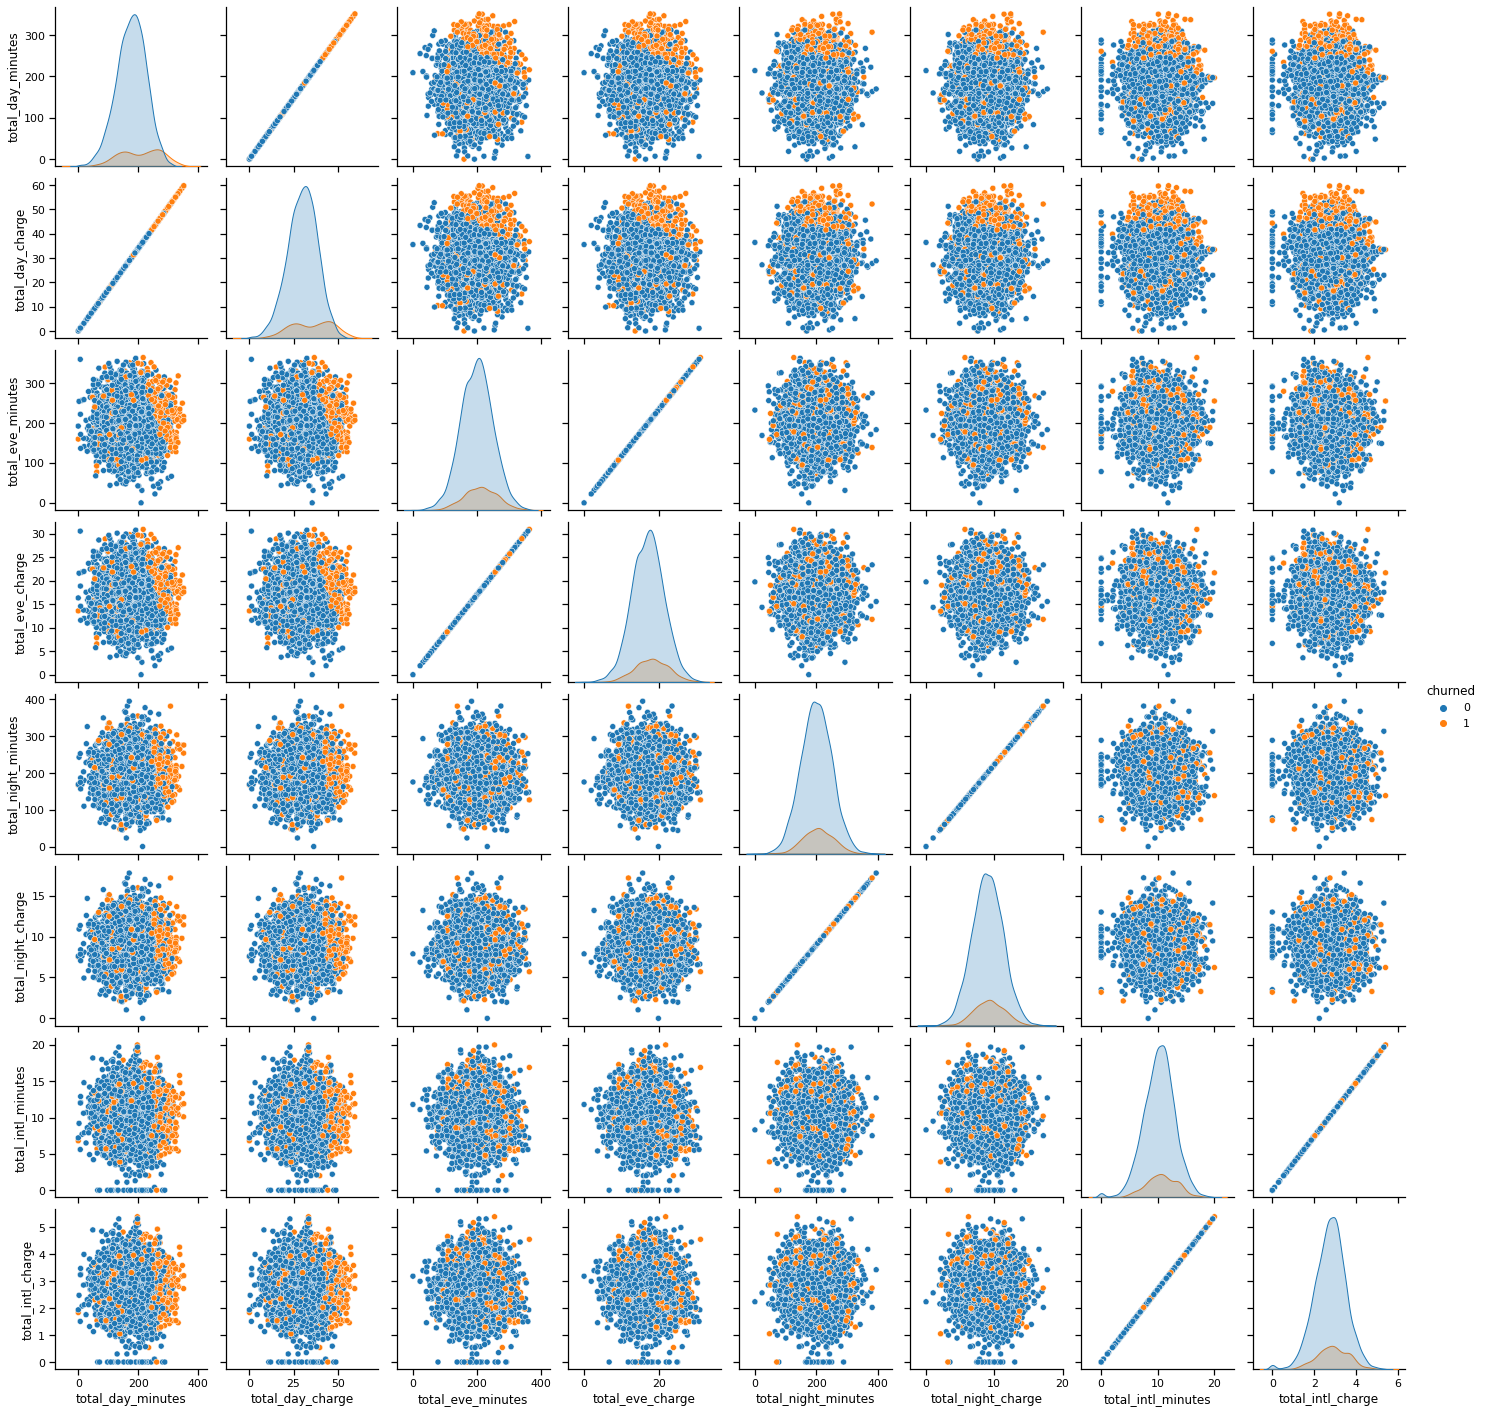

In [13]:
temp = data[float_col + ['churned']]

sns.set_context('notebook')
sns.pairplot(temp, 
             hue='churned', 
             
             )

In [15]:
# split data 
X=data.drop(columns="churned")
y=data["churned"]
x_trin ,x_test ,y_train ,y_test = train_test_split(X,y,test_size=0.25,random_state=42)

In [16]:
x_test

,account_length,intl_plan,voice_mail_plan,number_vmail_messages,total_day_minutes,total_day_calls,total_day_charge,total_eve_minutes,total_eve_calls,total_eve_charge,total_night_minutes,total_night_calls,total_night_charge,total_intl_minutes,total_intl_calls,total_intl_charge,number_customer_service_calls
1501,72,0,0,0,272.4,88,46.31,107.9,125,9.17,185.5,81,8.35,12.7,2,3.43,0
2586,53,0,0,0,164.1,106,27.90,206.0,56,17.51,194.7,124,8.76,11.4,2,3.08,1
2653,155,0,1,30,61.6,103,10.47,255.1,110,21.68,225.9,96,10.17,12.4,5,3.35,1
1055,161,0,0,0,178.1,109,30.28,146.5,86,12.45,137.6,78,6.19,8.5,2,2.30,1
705,99,0,0,0,62.9,81,10.69,231.0,64,19.64,168.9,121,7.60,8.5,5,2.30,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4141,116,0,0,0,255.5,93,43.44,224.4,122,19.07,317.3,85,14.28,12.7,4,3.43,1
3168,201,0,0,0,225.9,110,38.40,299.1,86,25.42,251.3,81,11.31,11.2,4,3.02,1
2478,123,0,1,34,305.2,80,51.88,156.5,109,13.30,280.0,81,12.60,13.2,7,3.56,1
4214,126,0,0,0,175.6,91,29.85,151.1,100,12.84,201.5,100,9.07,9.9,2,2.67,1


In [15]:
# features scaling 
sc = StandardScaler()

x_trin =sc.fit_transform(x_trin)
x_test =sc.fit_transform(x_test)


## logistic regression 

In [16]:
LR =LogisticRegression(penalty="l2")

param_grid ={"C":[0.001,0.01,0.1]}

GS_LR=GridSearchCV(LR,param_grid=param_grid,scoring="accuracy",cv=4)

GS_LR.fit(x_trin,y_train)
   
GS_LR.best_estimator_

LogisticRegression(C=0.01)

# naive bayes 


In [17]:
BNB = BernoulliNB(alpha=1.0)
BNB.fit(x_trin,y_train)

BernoulliNB()

## linear cv


In [18]:
param_grid ={"C":[0.01,0.1,1.0,10.0]}
LSVC =LinearSVC(penalty="l2")
LSVC =GridSearchCV(LSVC,param_grid=param_grid,scoring="accuracy",cv=4)
LSVC.fit(x_trin,y_train)
LSVC.best_estimator_

LinearSVC(C=0.1)

## SVM WITH KERNEL S

In [19]:
param_grid ={"C":[0.01,0.1,1.0,10.0],"gamma" :[0.5, 1, 2, 10]}

rbfsvc =SVC(kernel="rbf")
SVCrbf=GridSearchCV(rbfsvc,param_grid=param_grid)
SVCrbf.fit(x_trin,y_train)
SVCrbf.best_estimator_

SVC(C=10.0, gamma=0.5)

## decision Tree 

In [21]:
# fit model to determine num of node & feature importance  
DT =DecisionTreeClassifier(random_state=42)
DT.fit(x_trin,y_train)
DT.tree_.max_depth ,DT.tree_.node_count

(22, 443)

In [22]:
param_grid = {'max_depth':range(1, DT.tree_.max_depth+1, 2),
              'max_features': range(1, len(DT.feature_importances_)+1)}

GR_DT = GridSearchCV(DT,
                  param_grid=param_grid,
                  scoring='accuracy',
                  n_jobs=-1) # using all processors

GR_DT = GR_DT.fit(x_trin, y_train)

In [23]:
GR_DT.best_estimator_

DecisionTreeClassifier(max_depth=9, max_features=15, random_state=42)

## AdaBoost 

In [24]:
ABC = AdaBoostClassifier(DecisionTreeClassifier(max_features=4))

param_grid = {'n_estimators': [100, 150, 200],
              'learning_rate': [0.1,0.01,0.001]}

GV_ABC = GridSearchCV(ABC,
                      param_grid=param_grid, 
                      scoring='accuracy',
                      n_jobs=-1)

GV_ABC = GV_ABC.fit(x_trin, y_train)
GV_ABC.best_estimator_

AdaBoostClassifier(base_estimator=DecisionTreeClassifier(max_features=4),
                   learning_rate=0.1, n_estimators=100)

## Random forest & Extra tree  (Bagging)
 - which perform best in oob error 

In [38]:
# Random forest 
oob_list = list()

RF = RandomForestClassifier(oob_score=True, 
                            random_state=42, 
                            warm_start=True,
                            n_jobs=-1)


# number of trees ! check when n tree unchanges oob error 
for n_trees in [15, 20, 30, 40, 50, 100, 150, 200, 300, 400]:
    
    
    RF.set_params(n_estimators=n_trees)

    # Fit the model
    RF.fit(x_trin, y_train)

    # Get the oob error
    oob_error = 1 - RF.oob_score_
    
    # Store it in dataframe
    oob_list.append(pd.Series({'n_trees': n_trees, 'oob': oob_error}))

RD_oob_df = pd.concat(oob_list, axis=1).T.set_index('n_trees')

RD_oob_df

,oob
n_trees,
15.0,0.054933
20.0,0.053600
30.0,0.048800
40.0,0.046400
50.0,0.048000
100.0,0.044000
150.0,0.044800
200.0,0.043200
300.0,0.044000


In [39]:
# extra tree classifier 
oob_list = list()
EF = ExtraTreesClassifier(oob_score=True, 
                          random_state=42, 
                          warm_start=True,
                          bootstrap=True,
                          n_jobs=-1)


for n_trees in [15, 20, 30, 40, 50, 100, 150, 200, 300, 400]:
    
    EF.set_params(n_estimators=n_trees)
    EF.fit(x_trin, y_train)

    # oob error
    oob_error = 1 - EF.oob_score_
    oob_list.append(pd.Series({'n_trees': n_trees, 'oob': oob_error}))

et_oob_df = pd.concat(oob_list, axis=1).T.set_index('n_trees')

et_oob_df

,oob
n_trees,
15.0,0.088000
20.0,0.083200
30.0,0.075200
40.0,0.074667
50.0,0.072000
100.0,0.064267
150.0,0.061333
200.0,0.062667
300.0,0.060533


In [40]:
# merge dataframes 
oob_df = pd.concat([RD_oob_df.rename(columns={'oob':'RandomForest'}),
                    et_oob_df.rename(columns={'oob':'ExtraTrees'})], axis=1)

oob_df

,RandomForest,ExtraTrees
n_trees,,
15.0,0.054933,0.088000
20.0,0.053600,0.083200
30.0,0.048800,0.075200
40.0,0.046400,0.074667
50.0,0.048000,0.072000
100.0,0.044000,0.064267
150.0,0.044800,0.061333
200.0,0.043200,0.062667
300.0,0.044000,0.060533


[Text(0, 0.5, 'out-of-bag error')]

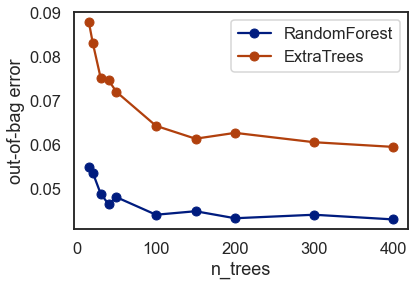

In [41]:
import seaborn as sns 
import matplotlib.pyplot as plt 
%matplotlib inline 

sns.set_context("talk")
sns.set_palette("dark")
sns.set_style("white")

ax = oob_df.plot(marker='o')
ax.set(ylabel='out-of-bag error')

#### The random forest model performs consistently better than the extra randomized trees.

In [42]:
# set n_tree =100 in Randomforest 
RF = RandomForestClassifier(n_estimators=100)
RF.fit(x_trin,y_train)

RandomForestClassifier()

## gradient boosted classifier (BOOSTING )
- CHECK error for n tree (n_estimator)

In [43]:
error_list = list()

# Iterate through all of the possibilities for number of estimators
tree_list = [15, 50, 100, 200, 400]
for n_trees in tree_list:
    
    # Initialize the gradient boost classifier
    GBC = GradientBoostingClassifier(n_estimators=n_trees, 
                                     subsample=0.5,
                                     max_features=4,
                                     random_state=42)

    # Fit the model
    GBC.fit(x_trin, y_train)
    y_pred = GBC.predict(x_test)

    # Get the error
    error = 1. - accuracy_score(y_test, y_pred)
    
    # Store it
    error_list.append(pd.Series({'n_trees': n_trees, 'error': error}))

error_df = pd.concat(error_list, axis=1).T.set_index('n_trees')

error_df

,error
n_trees,
15.0,0.0920
50.0,0.0608
100.0,0.0600
200.0,0.0528
400.0,0.0456


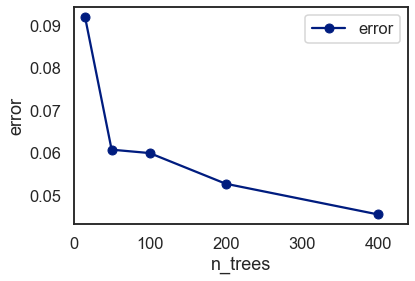

In [44]:
# show plot 
ax = error_df.plot(marker='o')

# Set parameters
ax.set(xlabel='n_trees', ylabel='error')
ax.set_xlim(0, max(error_df.index)*1.1);

In [45]:
param_grid = {'n_estimators': [200,300 ,400],
              'learning_rate': [0.001,0.01,0.1]
             }
# The grid search object
GV_GBC = GridSearchCV(GradientBoostingClassifier(subsample=0.5,
                                                 max_features=4,
                                                 random_state=42), 
                      param_grid=param_grid, 
                      scoring='accuracy',
                      n_jobs=-1)

# Do the grid search
GV_GBC = GV_GBC.fit(x_trin, y_train)
# best estimator
GV_GBC.best_estimator_

GradientBoostingClassifier(max_features=4, n_estimators=200, random_state=42,
                           subsample=0.5)

## combine model | stacked model

In [46]:
# The combined model--logistic regression and Randomforest 
estimators = [('GS_LR', GS_LR), ('RF', RF)]

# this model using an additional hold-out data set and/or with cross validation
VC = VotingClassifier(estimators, voting='soft')
VC = VC.fit(x_trin, y_train)

In [47]:
from sklearn.preprocessing import label_binarize


In [48]:
models ={"GS_LR":GS_LR,"BNB":BNB,"LSVC":LSVC,"SVCrbf":SVCrbf,"GR_DT":GR_DT,"RF":RF,"GV_GBC":GV_GBC,"GV_ABC":GV_ABC,"VC":VC}
metrics = list()
cm = dict()
for nam, mod  in models.items():
    y_pred= mod.predict(x_test)
    ## Preciision, recall, f-score
    precision, recall, fscore, _ = score(y_test,y_pred, average='weighted')
    # the usuall accuracy
    accuracy = accuracy_score(y_test,y_pred)
    # ROC_AUC 
    auc = roc_auc_score(label_binarize(y_test, classes=[0,1]),
              label_binarize(y_pred, classes=[0,1]), 
              average='weighted')
    # confusion matrix
    cm[nam] = confusion_matrix(y_test, y_pred)
    
    metrics.append(pd.Series({'precision':precision, 'recall':recall, 
                              'fscore':fscore, 'accuracy':accuracy,
                              'auc':auc}, 
                             name=nam))
metrics =pd.concat(metrics,axis=1)    

In [49]:
metrics

,GS_LR,BNB,LSVC,SVCrbf,GR_DT,RF,GV_GBC,GV_ABC,VC
precision,0.855524,0.819994,0.850290,0.853753,0.938305,0.954166,0.945768,0.892410,0.934491
recall,0.875200,0.858400,0.872800,0.866400,0.940800,0.955200,0.947200,0.888800,0.932000
fscore,0.843235,0.825319,0.839796,0.813537,0.937685,0.953123,0.944082,0.890464,0.923219
accuracy,0.875200,0.858400,0.872800,0.866400,0.940800,0.955200,0.947200,0.888800,0.932000
auc,0.587857,0.561237,0.581646,0.527342,0.830716,0.865578,0.839251,0.783650,0.762974


In [50]:
cr = classification_report(y_test, y_pred)
print(cr)

              precision    recall  f1-score   support

           0       0.93      1.00      0.96      1076
           1       0.97      0.53      0.68       174

    accuracy                           0.93      1250
   macro avg       0.95      0.76      0.82      1250
weighted avg       0.93      0.93      0.92      1250



In [51]:
import joblib

In [52]:
# save best estimator Randomforest 

model =RF 

joblib.dump(model,"RF_v1.ml")


['RF_v1.ml']

In [89]:
load_model = joblib.load("RF_v1.ml")
test=load_model.predict(x_test[45:46]) # 17 features 

In [90]:
test

array([0])